### Average Number of Years Lost For People Who Died of Coronavirus in China

We illustrate the use of the package by estimating the average number of years by which people's lives are shortened due to coronavirus. Using data from [Table 1 of the paper](http://weekly.chinacdc.cn/en/article/id/e53946e2-c6c4-41e9-9a9b-fea8db1a8f51>) that gives us the distribution of ages of people who died from COVID-19 in China, with conservative assumptions (assuming gender of the dead person to be male, taking the middle of age ranges) we find that people's lives are shortened by about 11 years on average. These estimates are conservative for one additional reason: there is likely an inverse correlation between people who die and their expected longevity. And note that given a bulk of the deaths are among older people, when people are more infirm, the quality adjusted years lost is likely yet more modest. Given that the last life tables from China are from 1981, we estimate the average number of years lost if people had the same profile as Americans. Using the most recent SSA data, we find that number to be 16. Compare this to deaths from road accidents, [the modal reason for death](https://www.businessinsider.com/how-youre-most-likely-to-die-at-every-age-2018-6) among 5-24 and 25-44 ages in the US. Male life expectancy in the US at 25 is another ~ 52 years.  


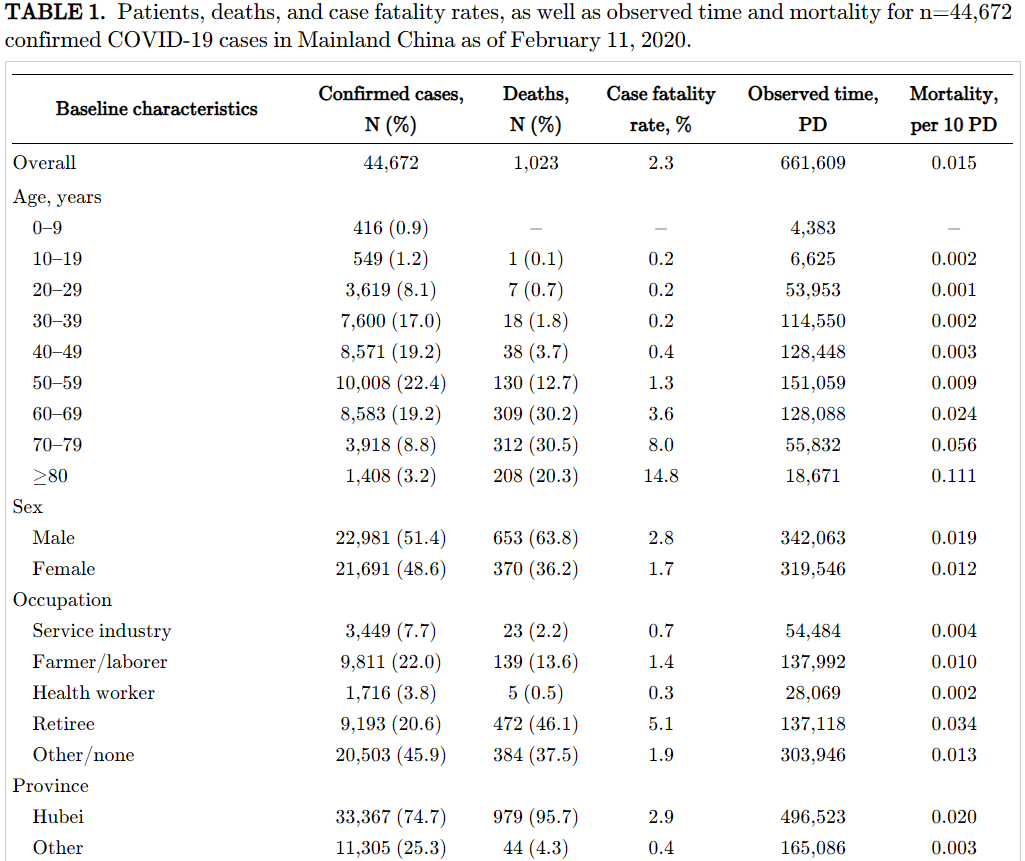


In [1]:
import pandas as pd
from lost_years import lost_years_hld

### Prepare example input in DataFrame
Please look at country codes here:- https://www.lifetable.de/cgi-bin/country_codes.php

In [2]:
df = pd.read_csv('/opt/github/lost_years/examples/covid19/table_1.csv')
df['year'] = 2020
df

,lowest_age,highest_age,middle_age,n_deaths,sex,country,year
0,10,19,15,1,M,CHN,2020
1,20,29,25,7,M,CHN,2020
2,30,39,25,18,M,CHN,2020
3,40,49,45,38,M,CHN,2020
4,50,59,55,130,M,CHN,2020
5,60,69,65,309,M,CHN,2020
6,70,79,75,312,M,CHN,2020
7,80,89,85,208,M,CHN,2020


### Get Human Life Table data columns from HLD dataset

In [3]:
highest_ldf = lost_years_hld(df, {'age': 'lowest_age', 'country': 'country', 'sex': 'sex', 'year': 'year'})
highest_ldf.head()

,lowest_age,highest_age,middle_age,n_deaths,sex,country,year,hld_country,hld_region,hld_residence,...,hld_version,hld_ref-id,hld_year1,hld_year2,hld_typelt,hld_sex,hld_age,hld_age_interval,hld_life_expectancy,hld_life_expectancy_orig
0,10,19,15,1,M,CHN,2020,CHN,0,0,...,1,223.40,1981,1981,1,1,10,1,60.38,60.37
0,10,19,15,1,M,CHN,2020,CHN,10,0,...,1,224.90,1981,1981,1,1,10,1,60.74,60.73
0,10,19,15,1,M,CHN,2020,CHN,20,0,...,1,224.19,1981,1981,1,1,10,1,62.22,62.2
0,10,19,15,1,M,CHN,2020,CHN,30,0,...,1,224.18,1981,1981,1,1,10,1,58.97,58.96
0,10,19,15,1,M,CHN,2020,CHN,40,0,...,1,224.10,1981,1981,1,1,10,1,59.25,59.24


**Note that the year we are matching to is 1981.**

In [4]:
# From table 1, 95.7% deaths in Hubie region == 110 (https://www.lifetable.de/cgi-bin/regions.php)
highest_ldf = highest_ldf[highest_ldf.hld_region=='110'].copy()
highest_ldf

,lowest_age,highest_age,middle_age,n_deaths,sex,country,year,hld_country,hld_region,hld_residence,...,hld_version,hld_ref-id,hld_year1,hld_year2,hld_typelt,hld_sex,hld_age,hld_age_interval,hld_life_expectancy,hld_life_expectancy_orig
0,10,19,15,1,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,10,1,58.30,58.3
1,20,29,25,7,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,20,1,48.88,48.88
2,30,39,25,18,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,30,1,39.69,39.68
3,40,49,45,38,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,40,1,30.56,30.55
4,50,59,55,130,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,50,1,21.87,21.87
5,60,69,65,309,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,60,1,14.34,14.33
6,70,79,75,312,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,70,1,8.70,8.68
7,80,89,85,208,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,80,1,4.88,4.85


### Assuming all the people who died were at the bottom of the age ranges

In [5]:
highest_ldf['years_lost'] = highest_ldf['hld_life_expectancy'] * highest_ldf['n_deaths'] / highest_ldf['n_deaths'].sum()
highest_ldf

,lowest_age,highest_age,middle_age,n_deaths,sex,country,year,hld_country,hld_region,hld_residence,...,hld_ref-id,hld_year1,hld_year2,hld_typelt,hld_sex,hld_age,hld_age_interval,hld_life_expectancy,hld_life_expectancy_orig,years_lost
0,10,19,15,1,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,10,1,58.30,58.3,0.056989
1,20,29,25,7,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,20,1,48.88,48.88,0.334467
2,30,39,25,18,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,30,1,39.69,39.68,0.698358
3,40,49,45,38,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,40,1,30.56,30.55,1.135171
4,50,59,55,130,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,50,1,21.87,21.87,2.779179
5,60,69,65,309,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,60,1,14.34,14.33,4.331437
6,70,79,75,312,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,70,1,8.70,8.68,2.653372
7,80,89,85,208,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,80,1,4.88,4.85,0.992219


In [6]:
highest_ldf['years_lost'].sum().round()

13.0

In [7]:
lowest_ldf = lost_years_hld(df, {'age': 'highest_age', 'country': 'country', 'sex': 'sex', 'year': 'year'})
lowest_ldf.head()

,lowest_age,highest_age,middle_age,n_deaths,sex,country,year,hld_country,hld_region,hld_residence,...,hld_version,hld_ref-id,hld_year1,hld_year2,hld_typelt,hld_sex,hld_age,hld_age_interval,hld_life_expectancy,hld_life_expectancy_orig
0,10,19,15,1,M,CHN,2020,CHN,0,0,...,1,223.40,1981,1981,1,1,19,1,51.83,51.82
0,10,19,15,1,M,CHN,2020,CHN,10,0,...,1,224.90,1981,1981,1,1,19,1,52.14,52.13
0,10,19,15,1,M,CHN,2020,CHN,20,0,...,1,224.19,1981,1981,1,1,19,1,53.53,53.51
0,10,19,15,1,M,CHN,2020,CHN,30,0,...,1,224.18,1981,1981,1,1,19,1,50.43,50.42
0,10,19,15,1,M,CHN,2020,CHN,40,0,...,1,224.10,1981,1981,1,1,19,1,50.72,50.7


### Assuming all the people who died were at the top of the age ranges

In [8]:
# From table 1, 95.7% deaths in Hubie region == 110 (https://www.lifetable.de/cgi-bin/regions.php)
lowest_ldf = lowest_ldf[lowest_ldf.hld_region=='110'].copy()
lowest_ldf

,lowest_age,highest_age,middle_age,n_deaths,sex,country,year,hld_country,hld_region,hld_residence,...,hld_version,hld_ref-id,hld_year1,hld_year2,hld_typelt,hld_sex,hld_age,hld_age_interval,hld_life_expectancy,hld_life_expectancy_orig
0,10,19,15,1,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,19,1,49.81,49.8
1,20,29,25,7,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,29,1,40.62,40.61
2,30,39,25,18,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,39,1,31.46,31.46
3,40,49,45,38,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,49,1,22.70,22.69
4,50,59,55,130,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,59,1,15.02,15.01
5,60,69,65,309,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,69,1,9.19,9.17
6,70,79,75,312,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,79,1,5.19,5.16
7,80,89,85,208,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,89,1,2.89,2.7


In [9]:
lowest_ldf['years_lost'] = lowest_ldf['hld_life_expectancy'] * lowest_ldf['n_deaths'] / lowest_ldf['n_deaths'].sum()
lowest_ldf

,lowest_age,highest_age,middle_age,n_deaths,sex,country,year,hld_country,hld_region,hld_residence,...,hld_ref-id,hld_year1,hld_year2,hld_typelt,hld_sex,hld_age,hld_age_interval,hld_life_expectancy,hld_life_expectancy_orig,years_lost
0,10,19,15,1,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,19,1,49.81,49.8,0.048690
1,20,29,25,7,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,29,1,40.62,40.61,0.277947
2,30,39,25,18,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,39,1,31.46,31.46,0.553548
3,40,49,45,38,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,49,1,22.70,22.69,0.843206
4,50,59,55,130,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,59,1,15.02,15.01,1.908700
5,60,69,65,309,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,69,1,9.19,9.17,2.775865
6,70,79,75,312,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,79,1,5.19,5.16,1.582874
7,80,89,85,208,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,89,1,2.89,2.7,0.587605


In [10]:
lowest_ldf['years_lost'].sum().round()

9.0

In [11]:
middle_ldf = lost_years_hld(df, {'age': 'middle_age', 'country': 'country', 'sex': 'sex', 'year': 'year'})
middle_ldf.head()

,lowest_age,highest_age,middle_age,n_deaths,sex,country,year,hld_country,hld_region,hld_residence,...,hld_version,hld_ref-id,hld_year1,hld_year2,hld_typelt,hld_sex,hld_age,hld_age_interval,hld_life_expectancy,hld_life_expectancy_orig
0,10,19,15,1,M,CHN,2020,CHN,0,0,...,1,223.40,1981,1981,1,1,15,1,55.61,55.6
0,10,19,15,1,M,CHN,2020,CHN,10,0,...,1,224.90,1981,1981,1,1,15,1,55.94,55.93
0,10,19,15,1,M,CHN,2020,CHN,20,0,...,1,224.19,1981,1981,1,1,15,1,57.37,57.35
0,10,19,15,1,M,CHN,2020,CHN,30,0,...,1,224.18,1981,1981,1,1,15,1,54.20,54.19
0,10,19,15,1,M,CHN,2020,CHN,40,0,...,1,224.10,1981,1981,1,1,15,1,54.47,54.46


### Assuming all the people who died were at the middle of the age ranges

In [12]:
# From table 1, 95.7% deaths in Hubie region == 110 (https://www.lifetable.de/cgi-bin/regions.php)
middle_ldf = middle_ldf[middle_ldf.hld_region=='110'].copy()
middle_ldf

,lowest_age,highest_age,middle_age,n_deaths,sex,country,year,hld_country,hld_region,hld_residence,...,hld_version,hld_ref-id,hld_year1,hld_year2,hld_typelt,hld_sex,hld_age,hld_age_interval,hld_life_expectancy,hld_life_expectancy_orig
0,10,19,15,1,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,15,1,53.55,53.55
1,20,29,25,7,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,25,1,44.32,44.32
2,30,39,25,18,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,25,1,44.32,44.32
3,40,49,45,38,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,45,1,26.12,26.11
4,50,59,55,130,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,55,1,17.91,17.9
5,60,69,65,309,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,65,1,11.34,11.33
6,70,79,75,312,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,75,1,6.65,6.63
7,80,89,85,208,M,CHN,2020,CHN,110,0,...,1,224.26,1981,1981,1,1,85,1,3.64,3.57


In [13]:
middle_ldf['years_lost'] = middle_ldf['hld_life_expectancy'] * middle_ldf['n_deaths'] / middle_ldf['n_deaths'].sum()
middle_ldf

,lowest_age,highest_age,middle_age,n_deaths,sex,country,year,hld_country,hld_region,hld_residence,...,hld_ref-id,hld_year1,hld_year2,hld_typelt,hld_sex,hld_age,hld_age_interval,hld_life_expectancy,hld_life_expectancy_orig,years_lost
0,10,19,15,1,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,15,1,53.55,53.55,0.052346
1,20,29,25,7,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,25,1,44.32,44.32,0.303265
2,30,39,25,18,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,25,1,44.32,44.32,0.779824
3,40,49,45,38,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,45,1,26.12,26.11,0.970244
4,50,59,55,130,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,55,1,17.91,17.9,2.275953
5,60,69,65,309,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,65,1,11.34,11.33,3.425279
6,70,79,75,312,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,75,1,6.65,6.63,2.028152
7,80,89,85,208,M,CHN,2020,CHN,110,0,...,224.26,1981,1981,1,1,85,1,3.64,3.57,0.740098


In [14]:
middle_ldf['years_lost'].sum().round()

11.0

### Assume the Longevity is the Same as People in the US

In [15]:
from lost_years import lost_years_ssa

In [16]:
ssa_middle_ldf = lost_years_ssa(df, {'age': 'middle_age', 'sex': 'sex', 'year': 'year'})
ssa_middle_ldf.head()

,lowest_age,highest_age,middle_age,n_deaths,sex,country,year,ssa_age,ssa_year,ssa_life_expectancy
0,10,19,15,1,M,CHN,2020,15,2016,61.70
1,20,29,25,7,M,CHN,2020,25,2016,52.30
2,30,39,25,18,M,CHN,2020,25,2016,52.30
3,40,49,45,38,M,CHN,2020,45,2016,34.08
4,50,59,55,130,M,CHN,2020,55,2016,25.52


In [17]:
ssa_middle_ldf['years_lost'] = ssa_middle_ldf['ssa_life_expectancy'] * ssa_middle_ldf['n_deaths'] / ssa_middle_ldf['n_deaths'].sum()
ssa_middle_ldf

,lowest_age,highest_age,middle_age,n_deaths,sex,country,year,ssa_age,ssa_year,ssa_life_expectancy,years_lost
0,10,19,15,1,M,CHN,2020,15,2016,61.70,0.060313
1,20,29,25,7,M,CHN,2020,25,2016,52.30,0.357869
2,30,39,25,18,M,CHN,2020,25,2016,52.30,0.920235
3,40,49,45,38,M,CHN,2020,45,2016,34.08,1.265924
4,50,59,55,130,M,CHN,2020,55,2016,25.52,3.243011
5,60,69,65,309,M,CHN,2020,65,2016,17.92,5.412786
6,70,79,75,312,M,CHN,2020,75,2016,11.18,3.409736
7,80,89,85,208,M,CHN,2020,85,2016,5.94,1.207742


In [18]:
ssa_middle_ldf['years_lost'].sum().round()

16.0

### Assume Everyone Lives Till 90

In [19]:
y90_middle_ldf = df.copy()
y90_middle_ldf['y90_life_expectancy'] = 90 - y90_middle_ldf['middle_age']
y90_middle_ldf.head()

,lowest_age,highest_age,middle_age,n_deaths,sex,country,year,y90_life_expectancy
0,10,19,15,1,M,CHN,2020,75
1,20,29,25,7,M,CHN,2020,65
2,30,39,25,18,M,CHN,2020,65
3,40,49,45,38,M,CHN,2020,45
4,50,59,55,130,M,CHN,2020,35


In [20]:
y90_middle_ldf['years_lost'] = y90_middle_ldf['y90_life_expectancy'] * y90_middle_ldf['n_deaths'] / y90_middle_ldf['n_deaths'].sum()
y90_middle_ldf

,lowest_age,highest_age,middle_age,n_deaths,sex,country,year,y90_life_expectancy,years_lost
0,10,19,15,1,M,CHN,2020,75,0.073314
1,20,29,25,7,M,CHN,2020,65,0.444770
2,30,39,25,18,M,CHN,2020,65,1.143695
3,40,49,45,38,M,CHN,2020,45,1.671554
4,50,59,55,130,M,CHN,2020,35,4.447703
5,60,69,65,309,M,CHN,2020,25,7.551320
6,70,79,75,312,M,CHN,2020,15,4.574780
7,80,89,85,208,M,CHN,2020,5,1.016618


In [21]:
y90_middle_ldf['years_lost'].sum().round()

21.0